In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re     #REGEX FUNCTION (for text cleaning )
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
df= pd.read_csv("spam_ham_dataset.csv")

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.size

20684

In [6]:
df.shape


(5171, 4)

In [7]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)  # remove emails
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove special characters and digits
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

In [10]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\w'
C:\Users\User\AppData\Local\Temp\ipykernel_9284\3245659261.py:4: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\User\AppData\Local\Temp\ipykernel_9284\3245659261.py:6: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\User\AppData\Local\Temp\ipykernel_9284\3245659261.py:10: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [11]:
df['text']=df['text'].apply(wordopt)

# data visualization


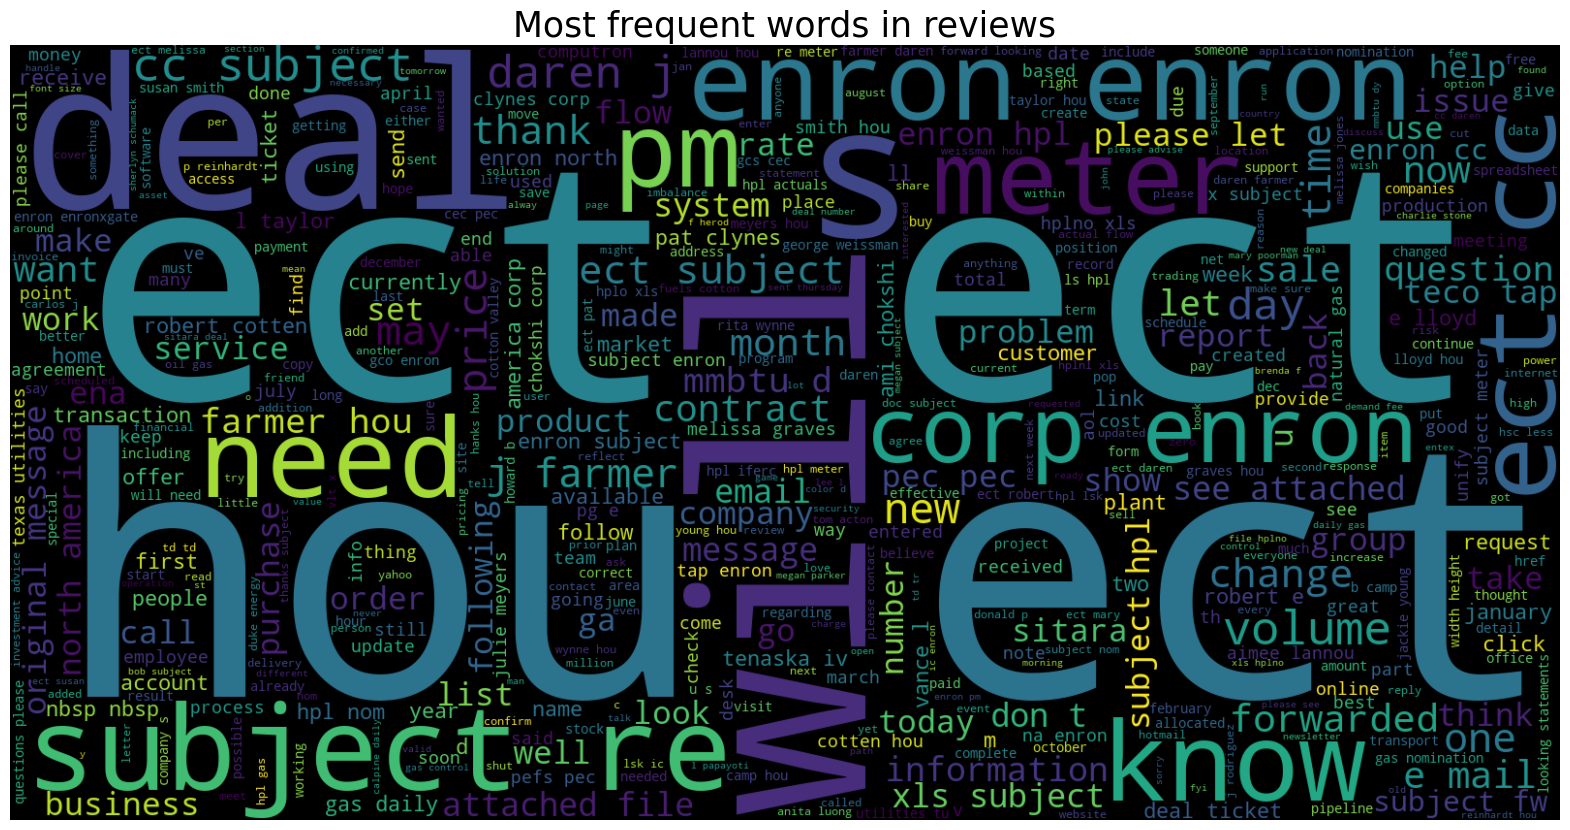

In [13]:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in reviews', fontsize=25)
plt.show()

# data splitting

In [15]:
x=df['text']
y=df['label_num']


In [16]:
x

0       subject  enron methanol   meter       this is ...
1       subject  hpl nom for january        see attach...
2       subject  neon retreat  ho ho ho   we   re arou...
3       subject  photoshop   windows   office   cheap ...
4       subject  re   indian springs  this deal is to ...
                              ...                        
5166    subject  put the  on the ft  the transport vol...
5167    subject         and following noms  hpl can   ...
5168    subject  calpine daily gas nomination        j...
5169    subject  industrial worksheets for august  act...
5170    subject  important online banking alert  dear ...
Name: text, Length: 5171, dtype: object

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3878,) (1293,) (3878,) (1293,)


#  NLP

In [20]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [21]:
xv_train

<3878x39046 sparse matrix of type '<class 'numpy.float64'>'
	with 313923 stored elements in Compressed Sparse Row format>

In [22]:
xv_train.shape

(3878, 39046)

In [23]:
xv_test.shape

(1293, 39046)

# Model Building

In [25]:
# Logistic Regression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [26]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.982985305491106

In [28]:
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       930
           1       0.97      0.97      0.97       363

    accuracy                           0.98      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       0.98      0.98      0.98      1293



# Decision Tree Classifier


In [30]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [31]:
pred_dt1=DT.predict(xv_test)
pred_dt1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
pred_dt2=DT.predict(xv_train)
pred_dt2

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
DT_acc=accuracy_score(y_test,pred_dt1)
DT_acc

0.9303944315545244

# Gradient Boosting Classifier

In [35]:
GB=GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [36]:
pred_gb=GB.predict(xv_test)
#pred_gb=GB.predict(xv_train)
pred_gb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
y_test

1566    0
1988    1
1235    0
2868    0
4903    0
       ..
5170    1
3825    1
3431    0
4513    0
3667    0
Name: label_num, Length: 1293, dtype: int64

In [38]:
GB_acc=accuracy_score(y_test,pred_gb)
GB_acc

0.9605568445475638

In [39]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       930
           1       0.93      0.93      0.93       363

    accuracy                           0.96      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



# Random Forest Classifier

In [41]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [42]:
pred_rf=RF.predict(xv_test)

In [43]:
RF_acc=RF.score(xv_test,y_test)
RF_acc

0.9690641918020109

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_rf))

[[918  12]
 [ 28 335]]


# Performance Analysis on each model

In [46]:
pt=[]
t=[]
for i in[LR,GB,RF,DT]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
    t.append(round(accuracy_score(y_train,i.predict(xv_train))*100,2))
print(pt)
print(t)

[98.3, 96.06, 96.91, 93.04]
[99.36, 98.04, 100.0, 100.0]
